In [9]:
import pyodbc
import pandas as pd
from sqlalchemy import create_engine
import os

server = r'LAPTOP-VE29G3P8\SQLEXPRESS01' 
database = 'ecommerce'
driver = 'ODBC Driver 17 for SQL Server'

connection_string = f"DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;"

conn = pyodbc.connect(connection_string)

engine = create_engine(f"mssql+pyodbc://{server}/{database}?driver={driver}&trusted_connection=yes")

csv_files = [
    r'D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\customers.csv',
    r'D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\geolocation.csv',
    r'D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\order_items.csv',
    r'D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\orders.csv',
    r'D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\payments.csv',
    r'D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\products.csv',
    r'D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\sellers.csv'
]
csv_to_table_mapping = {
    r'D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\customers.csv': 'customers',
    r'D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\geolocation.csv': 'geolocation',
    r'D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\order_items.csv': 'order_items',
    r'D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\orders.csv': 'orders',
    r'D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\payments.csv': 'payments',
    r'D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\products.csv': 'products',
    r'D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\sellers.csv': 'sellers',    
}

for csv_file in csv_files:
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file)
    
    # Get the corresponding table name from the mapping
    table_name = csv_to_table_mapping[csv_file]
    
    # Insert data into the specified SQL table
    df.to_sql(table_name, engine, if_exists='replace', index=False)
    
    print(f"Data from {csv_file} inserted into {table_name} table.")

print("All CSV files have been processed and inserted into SQL tables.")


Data from D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\customers.csv inserted into customers table.
Data from D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\geolocation.csv inserted into geolocation table.
Data from D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\order_items.csv inserted into order_items table.
Data from D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\orders.csv inserted into orders table.
Data from D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\payments.csv inserted into payments table.
Data from D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\products.csv inserted into products table.
Data from D:\Learning\Python\Projects\WsCube YT - Sales\Dataset\sellers.csv inserted into sellers table.
All CSV files have been processed and inserted into SQL tables.


In [1]:
import pyodbc
import pandas as pd
from sqlalchemy import create_engine
import os

server = r'LAPTOP-VE29G3P8\SQLEXPRESS01'
database = 'ecommerce'
driver = 'ODBC Driver 17 for SQL Server'

connection_string = f"DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;connection Timeout=30"

conn = pyodbc.connect(connection_string)

engine = create_engine(f"mssql+pyodbc://{server}/{database}?driver={driver}&trusted_connection=yes")


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Q1. List all unique cities where customers are located

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

query1 = '''
select distinct customer_city from customers'''
df_q1=pd.read_sql(query1,engine)
df_q1

,customer_city
0,abadia dos dourados
1,abadiania
2,abaete
3,abaetetuba
4,abaiara
...,...
4114,xinguara
4115,xique-xique
4116,zacarias
4117,ze doca


### Q2. Count the number of orders placed in 2017

In [13]:
query2 = '''
select count(order_id) as Total_orders_2017 from orders
where year(order_purchase_timestamp)='2017'
'''
df_q2=pd.read_sql(query2,engine)
df_q2.head()

,Total_orders_2017
0,45101


### Q3. Find the total sales per category.

In [94]:
query3 = '''
select p.[product category] category,round(sum(o.price+o.freight_value),2) tot_sales
from order_items o
join products p on o.product_id=p.product_id
where p.[product category] is not null
group by p.[product category]
'''
df_q3=pd.read_sql(query3,engine)
df_q3

,category,tot_sales
0,fixed telephony,64220.81
1,House comfort,67073.27
2,Cool Stuff,719329.95
3,ELECTRICES 2,123917.92
4,Construction Tools Construction,165328.00
...,...,...
68,Furniture Kitchen Service Area Dinner and Garden,58327.80
69,CONSTRUCTION SECURITY TOOLS,44463.62
70,insurance and services,324.51
71,Furniture office,342532.65


### Q4.Calculate the percentage of orders that were paid in installments

In [21]:
query4 = '''
select (sum(case when payment_installments >=1 then 1 else 0 end)) as instal_orders,
(sum(case when payment_installments >=1 then 1 else 0 end)*1.0) / count(*) * 100 as percentage
from payments
'''
df_q4=pd.read_sql(query4,engine)
df_q4

,instal_orders,percentage
0,103884,99.998075


### Q5. Count the number of customers from each state.

In [38]:
query5 = '''
select customer_state, count(customer_id) cust_per_state
from customers
group by customer_state order by cust_per_state desc
'''
df_q5=pd.read_sql(query5,engine)
df_q5.head(10)

,customer_state,cust_per_state
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


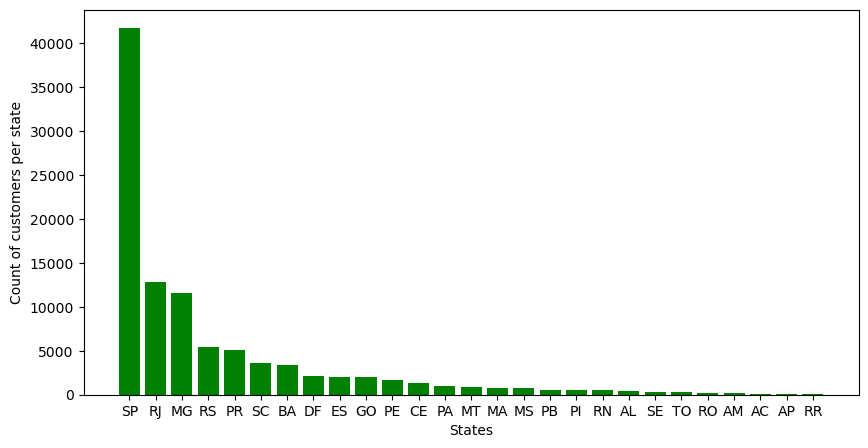

In [54]:
state=df_q5['customer_state']
count_per_state=df_q5['cust_per_state']
plt.figure(figsize=(10,5))
plt.bar(state,count_per_state,color='green')
plt.xlabel('States')
plt.ylabel('Count of customers per state')
plt.show()

### Q6. Calculate the number of orders per month in 2018.

In [5]:
query6 = '''
select month(order_purchase_timestamp) order_month,count(order_id) tot_orders_per_month
from orders
where year(order_purchase_timestamp)='2018'
group by month(order_purchase_timestamp)
order by order_month
'''
df_q6=pd.read_sql(query6,engine)
df_q6

,order_month,tot_orders_per_month
0,1,7269
1,2,6728
2,3,7211
3,4,6939
4,5,6873
5,6,6167
6,7,6292
7,8,6512
8,9,16
9,10,4


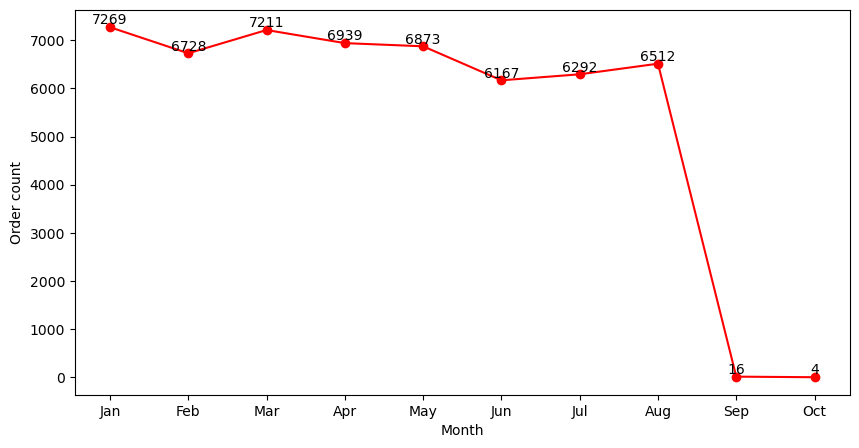

In [66]:
order_month=df_q6['order_month']
total_orders=df_q6['tot_orders_per_month']
plt.figure(figsize=(10,5))
plt.plot(order_month,total_orders,color='red',marker='o')
for i, value in enumerate(total_orders):
    plt.text(order_month[i], total_orders[i], str(value), ha='center', va='bottom')
plt.xticks(ticks=range(1, 11))
plt.xticks([1,2,3,4,5,6,7,8,9,10],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct'])
plt.xlabel('Month')
plt.ylabel('Order count')
plt.show()

### Q7. Find the average number of products per order, grouped by customer city

In [7]:
query7 = '''
with count_per_order as(
select o.order_id, o.customer_id, count(oi.order_id) tot_orders
from orders o
join order_items oi on o.order_id=oi.order_id
group by o.order_id, o.customer_id )

select c.customer_city, round(avg(cast(tot_orders as decimal)),2) avg_prdt_per_order
from customers c
join count_per_order co on c.customer_id=co.customer_id
group by c.customer_city
'''
df_q7=pd.read_sql(query7,engine)
df_q7

,customer_city,avg_prdt_per_order
0,abadia dos dourados,1.00
1,abadiania,1.00
2,abaete,1.00
3,abaetetuba,1.27
4,abaiara,1.00
...,...,...
4105,xinguara,1.11
4106,xique-xique,1.00
4107,zacarias,1.00
4108,ze doca,1.00


### Q8.Calculate the percentage of total revenue contributed by each product category.

In [13]:
query8 = '''
select p.[product category] category, 
round((sum(py.payment_value)/(select sum(payment_value) from payments)*100),2) sales_percentage
from products p 
join order_items o on p.product_id = o.product_id
join payments py on py.order_id = o.order_id
where p.[product category] is not null
group by p.[product category]
order by sales_percentage desc
'''
df_q8=pd.read_sql(query8,engine)
df_q8

,category,sales_percentage
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
...,...,...
68,flowers,0.01
69,cds music dvds,0.01
70,Arts and Crafts,0.01
71,Fashion Children's Clothing,0.00


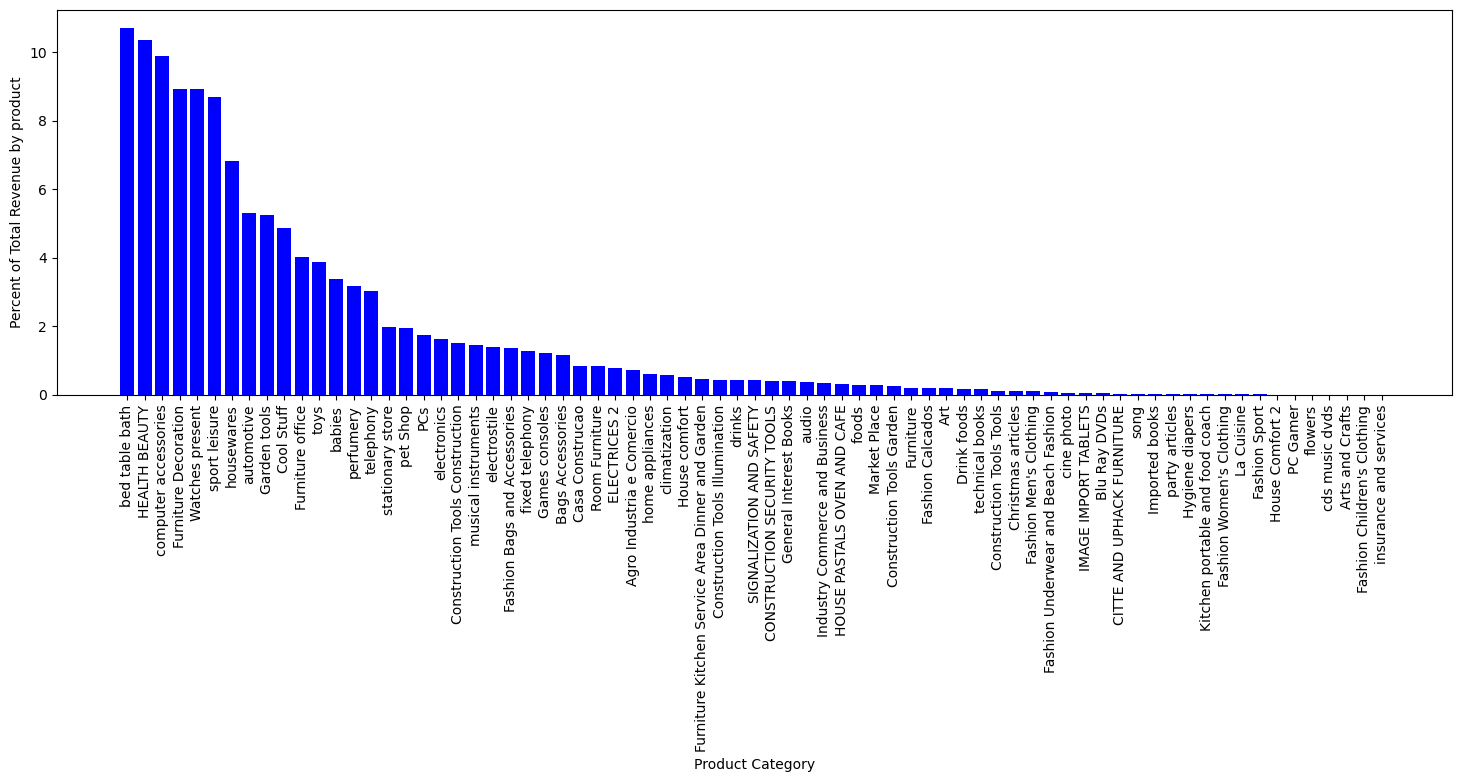

In [19]:
category=df_q8['category']
revenue_percentage=df_q8['sales_percentage']
plt.figure(figsize=(18,5))
plt.bar(category,revenue_percentage,color='blue')
plt.xlabel('Product Category')
plt.ylabel('Percent of Total Revenue by product')
plt.xticks(rotation=90)
plt.show()

### Q9.Identify the correlation between product price and the number of times a product has been purchased.

In [7]:
query9 = '''
select p.[product category] prdt_ctgry, count(oi.product_id) no_of_times_prdt_bought,round(avg(oi.price),2) as avg_prdt_price
from order_items oi
join products p on oi.product_id=p.product_id
--join payments py on oi.order_id=py.order_id
where p.[product category] is not null
group by p.[product category]
'''
df_q9=pd.read_sql(query9,engine)
df_q9

,prdt_ctgry,no_of_times_prdt_bought,avg_prdt_price
0,fixed telephony,264,225.69
1,House comfort,434,134.96
2,Cool Stuff,3796,167.36
3,ELECTRICES 2,238,476.12
4,Construction Tools Construction,929,155.73
...,...,...,...
68,Furniture Kitchen Service Area Dinner and Garden,281,164.87
69,CONSTRUCTION SECURITY TOOLS,194,208.99
70,insurance and services,2,141.64
71,Furniture office,1691,162.01


In [13]:
import numpy as np
order_count=df_q9["no_of_times_prdt_bought"]
product_price=df_q9["avg_prdt_price"]

correlation=np.corrcoef([order_count,product_price])
print(correlation)

[[ 1.         -0.10625383]
 [-0.10625383  1.        ]]


### Q10.Calculate the total revenue generated by each seller, and rank them by revenue

In [30]:
query10 = '''
with revenue as(
select s.seller_id,
round(sum((oi.price+oi.freight_value)),2) as revenue
from sellers s
join order_items oi on s.seller_id=oi.seller_id
group by s.seller_id)

select *, dense_rank() over(order by revenue desc) as rnk
from revenue
'''
df_q10=pd.read_sql(query10,engine)
df_q10.head(10)

,seller_id,revenue,rnk
0,4869f7a5dfa277a7dca6462dcf3b52b2,249640.70,1
1,7c67e1448b00f6e969d365cea6b010ab,239536.44,2
2,53243585a1d6dc2643021fd1853d8905,235856.68,3
3,4a3ca9315b744ce9f8e9374361493884,235539.96,4
4,fa1c13f2614d7b5c4749cbc52fecda94,204084.73,5
5,da8622b14eb17ae2831f4ac5b9dab84a,185192.32,6
6,7e93a43ef30c4f03f38b393420bc753a,182754.05,7
7,1025f0e2d44d7041d6cf58b6550e0bfa,172860.69,8
8,7a67c85e85bb2ce8582c35f2203ad736,162648.38,9
9,955fee9216a65b617aa5c0531780ce60,160602.68,10


### Q11. Calculate the moving average of order values for each customer over their order history

In [25]:
query11 = '''
with cust_payments as (
select o.customer_id as cust_id,o.order_purchase_timestamp as order_purchase_time,p.payment_value as payment_value
from orders o
join payments p on o.order_id=p.order_id
)

select cust_id, order_purchase_time,
avg(payment_value) over(partition by cust_id order by cast(order_purchase_time as datetime) rows between 2 preceding and current row) as mov_avg
from cust_payments
order by cust_id desc

'''
df_q11=pd.read_sql(query11,engine)
df_q11.head(10)

,cust_id,order_purchase_time,mov_avg
0,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.370
1,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500
2,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.130
3,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.130
4,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.640
5,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,5.065
6,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,27.120
7,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,91.910
8,fffc22669ca576ae3f654ea64c8f36be,2017-06-30 11:21:11,101.560
9,fffb97495f78be80e2759335275df2aa,2018-01-16 14:51:35,61.010


### Q12.Calculate the cumulative sales per month for each year.

In [42]:
query12 = '''
with sales as(
select year(o.order_purchase_timestamp) as year_v, month(o.order_purchase_timestamp) as month_v,
round(sum(py.payment_value),2) pay_value
from orders o 
join payments py on o.order_id = py.order_id
group by year(o.order_purchase_timestamp),month(o.order_purchase_timestamp)
--order by year_v,month(o.order_purchase_timestamp)
)

select year_v, month_v,
sum(pay_value) over( order by year_v, month_v rows between 2 preceding and current row) as cumulative_sum
from sales
order by year_v,month_v
'''
df_q12=pd.read_sql(query12,engine)
df_q12.head(15)

,year_v,month_v,cumulative_sum
0,2016,9,252.24
1,2016,10,59342.72
2,2016,12,59362.34
3,2017,1,197598.14
4,2017,2,430415.67
5,2017,3,880259.65
6,2017,4,1159559.64
7,2017,5,1460570.45
8,2017,6,1521983.23
9,2017,7,1696578.12


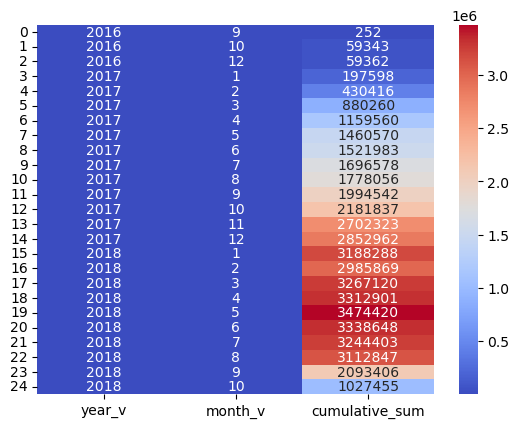

In [11]:
sns.heatmap(df_q12,annot=True,cmap='coolwarm',fmt='.0f')
plt.show()

### Q13. Calculate the year-over-year growth rate of total sales

In [38]:
query13 = '''
with sales as(
select year(o.order_purchase_timestamp) as year_v,
round(sum(py.payment_value),2) pay_value
from orders o 
join payments py on o.order_id = py.order_id
group by year(o.order_purchase_timestamp)
)

select year_v, round(((pay_value - lag(pay_value) over(order by year_v)) / lag(pay_value) over(order by year_v )) *100,2) as yoy_growth
from sales
'''
df_q13=pd.read_sql(query13,engine)
df_q13

,year_v,yoy_growth
0,2016,NaN
1,2017,12112.7
2,2018,20.0


### Q14. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [41]:
query14 = '''
with repeat_cust as (
select customer_id,min(cast (order_purchase_timestamp as date)) as first_order,
case 
	when datediff(month,min(cast (order_purchase_timestamp as date)),
		 lead(cast (order_purchase_timestamp as date))over(partition by customer_id order by order_purchase_timestamp)) = 6
	then 1 
	else 0
	end as six_month_purchase
from orders 
group by customer_id,order_purchase_timestamp
)

SELECT 
    (SUM(six_month_purchase) / COUNT(*)) *100 AS retention_percentage
FROM repeat_cust
'''
df_q14=pd.read_sql(query14,engine)
df_q14

,retention_percentage
0,0


### Q15. Identify the top 3 customers who spent the most money in each year

In [44]:
query15 = '''
with total_spent as (
select o.customer_id,year(o.order_purchase_timestamp) years,sum(py.payment_value) tot_spent,
dense_rank() over(partition by year(o.order_purchase_timestamp) order by sum(py.payment_value) desc) as rnk
from orders o
join payments py on o.order_id=py.order_id
group by year(o.order_purchase_timestamp),o.customer_id
--order by years,rnk asc
)

select years,customer_id,tot_spent,rnk
from total_spent
where rnk <='3'
'''
df_q15=pd.read_sql(query15,engine)
df_q15

,years,customer_id,tot_spent,rnk
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.55,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.74,2
2,2016,4a06381959b6670756de02e07b83815f,1227.78,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.08,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.31,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.88,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.21,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.44,3


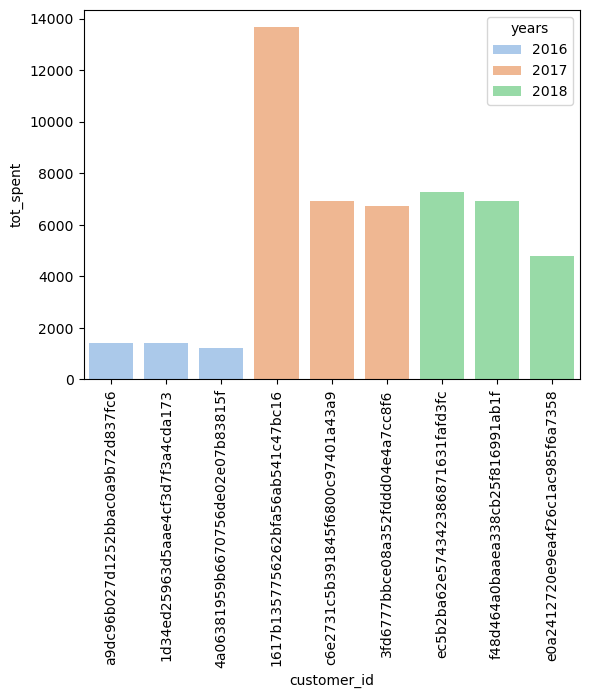

In [64]:
customer=df_q15["customer_id"]
money_spent=df_q15["tot_spent"]
years=df_q15["years"]
sns.barplot(x=customer, y=money_spent, hue=years,palette='pastel')
plt.xticks(rotation=90)
plt.show()